https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link/discussion

In [1]:
# Imports
import pandas as pd
import seaborn as sns
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.estimators import ParameterEstimator, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import networkx as nx
import pickle
import matplotlib.pyplot as plt

/usr/local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Bayesian Network

In [2]:
# Loead the cleaned dataset
df = pd.read_csv('../Datasets/cancer.csv')

# Load the disìctionary for interpreting labels
with open('../label_values.pkl', 'rb') as pickle_file:
    label_encodings = pickle.load(pickle_file)

In [3]:
# We build the Bayesian Network
# Creazione del modello bayesiano
# model = BayesianNetwork([
#                         # ('Gender', 'Smoking'), 
#                         ('Age Group', 'Level'), # not strong immune system in older age
#                         ('Air Pollution', 'Dust Allergy'), # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3192198/
#                         # ('Air Pollution', 'Smoking'), 
#                         # ('Alcohol use', 'Smoking'), 
#                         ('Smoking', 'Alcohol use'), # more smke -> more smog
#                         ('Dust Allergy', 'Coughing of Blood'), # allergy makes coughing more and more and could hurt
#                         ('OccuPational Hazards', 'chronic Lung Disease'), 
#                         ('Genetic Risk', 'chronic Lung Disease'),
#                         # ('chronic Lung Disease', 'Shortness of Breath'), 
#                         ('Balanced Diet', 'Obesity'),
#                         ('Obesity', 'Shortness of Breath'), 
#                         ('Smoking', 'Coughing of Blood'),
#                         # ('Smoking', 'Shortness of Breath'), 
#                         ('Passive Smoker', 'Coughing of Blood'),
#                         # ('Chest Pain', 'Shortness of Breath'), 
#                         ('Fatigue', 'Weight Loss'),
#                         ('Weight Loss', 'Shortness of Breath'), 
#                         # ('Shortness of Breath', 'Wheezing'),
#                         # ('Shortness of Breath', 'Swallowing Difficulty'), 
#                         # ('Clubbing of Finger Nails', 'Level'),
#                         ('Frequent Cold', 'Dry Cough'), 
#                         # ('Dry Cough', 'Level'), 
#                         # ('Snoring', 'Level')
#                     ])

# model = BayesianNetwork([
#         # ('Air Pollution', 'Alcohol use'),
#         ('Air Pollution', 'Dust Allergy'),
#         # ('Air Pollution', 'OccuPational Hazards'),
#         ('Air Pollution', 'Genetic Risk'),
#         ('Air Pollution', 'chronic Lung Disease'),
#         # ('Air Pollution', 'Balanced Diet'),
#         # ('Air Pollution', 'Obesity'),
#         # ('Air Pollution', 'Smoking'),
#         # ('Air Pollution', 'Passive Smoker'),
#         ('Air Pollution', 'Chest Pain'),
#         # ('Air Pollution', 'Coughing of Blood'),
#         ('Air Pollution', 'Level'),
#         # ('Alcohol use', 'Dust Allergy'),
#         ('Alcohol use', 'OccuPational Hazards'), # maybe
#         ('Alcohol use', 'Genetic Risk'), # maybe
#         ('Alcohol use', 'chronic Lung Disease'),
#         ('Alcohol use', 'Balanced Diet'),
#         ('Alcohol use', 'Obesity'),
#         ('Alcohol use', 'Smoking'),
#         ('Alcohol use', 'Passive Smoker'),
#         ('Alcohol use', 'Chest Pain'),
#         # ('Alcohol use', 'Coughing of Blood'),
#         # ('Alcohol use', 'Shortness of Breath'),
#         # ('Alcohol use', 'Clubbing of Finger Nails'),
#         ('Alcohol use', 'Level'),
#         # ('Dust Allergy', 'OccuPational Hazards'),
#         # ('Dust Allergy', 'Genetic Risk'),
#         ('Dust Allergy', 'chronic Lung Disease'),
#         # ('Dust Allergy', 'Balanced Diet'),
#         # ('Dust Allergy', 'Obesity'),
#         # ('Dust Allergy', 'Smoking'),
#         # ('Dust Allergy', 'Passive Smoker'),
#         # ('Dust Allergy', 'Chest Pain'),
#         ('Dust Allergy', 'Coughing of Blood'),
#         ('Dust Allergy', 'Fatigue'),
#         # ('Dust Allergy', 'Weight Loss'),
#         ('Dust Allergy', 'Shortness of Breath'),
#         ('Dust Allergy', 'Wheezing'),
#         # ('Dust Allergy', 'Clubbing of Finger Nails'),
#         ('Dust Allergy', 'Dry Cough'),
#         # ('OccuPational Hazards', 'Genetic Risk'),
#         # ('OccuPational Hazards', 'chronic Lung Disease'),
#         # ('OccuPational Hazards', 'Balanced Diet'),
#         # ('OccuPational Hazards', 'Obesity'),
#         # ('OccuPational Hazards', 'Smoking'),
#         # ('OccuPational Hazards', 'Passive Smoker'),
#         # ('OccuPational Hazards', 'Chest Pain'),
#         # ('OccuPational Hazards', 'Coughing of Blood'),
#         # ('OccuPational Hazards', 'Shortness of Breath'),
#         # ('OccuPational Hazards', 'Clubbing of Finger Nails'),
#         # ('OccuPational Hazards', 'Level'),
#         ('Genetic Risk', 'chronic Lung Disease'),
#         # ('Genetic Risk', 'Balanced Diet'),
#         ('Genetic Risk', 'Obesity'),
#         # ('Genetic Risk', 'Smoking'),
#         # ('Genetic Risk', 'Passive Smoker'),
#         ('Genetic Risk', 'Chest Pain'),
#         # ('Genetic Risk', 'Coughing of Blood'),
#         # ('Genetic Risk', 'Shortness of Breath'),
#         # ('Genetic Risk', 'Clubbing of Finger Nails'),
#         ('Genetic Risk', 'Level'),
#         # ('chronic Lung Disease', 'Balanced Diet'),
#         # ('chronic Lung Disease', 'Obesity'),
#         # ('chronic Lung Disease', 'Smoking'),
#         # ('chronic Lung Disease', 'Passive Smoker'),
#         ('chronic Lung Disease', 'Chest Pain'),
#         ('chronic Lung Disease', 'Coughing of Blood'),
#         ('chronic Lung Disease', 'Level'),
#         ('Balanced Diet', 'Obesity'),
#         # ('Balanced Diet', 'Smoking'),
#         # ('Balanced Diet', 'Passive Smoker'),
#         # ('Balanced Diet', 'Chest Pain'),
#         # ('Balanced Diet', 'Coughing of Blood'),
#         ('Balanced Diet', 'Fatigue'),
#         ('Balanced Diet', 'Shortness of Breath'),
#         # ('Balanced Diet', 'Dry Cough'),
#         ('Balanced Diet', 'Level'),
#         # ('Obesity', 'Smoking'),
#         # ('Obesity', 'Passive Smoker'),
#         # ('Obesity', 'Chest Pain'),
#         # ('Obesity', 'Coughing of Blood'),
#         ('Obesity', 'Fatigue'),
#         ('Obesity', 'Weight Loss'),
#         ('Obesity', 'Shortness of Breath'),
#         ('Obesity', 'Level'),
#         ('Smoking', 'Chest Pain'),
#         ('Smoking', 'Coughing of Blood'),
#         ('Smoking', 'Level'),
#         ('Smoking', 'Passive Smoker'), # I'll consider active and passive smoker to have the same influences
#         ('Passive Smoker', 'Chest Pain'),
#         ('Passive Smoker', 'Coughing of Blood'),
#         ('Passive Smoker', 'Fatigue'),
#         # ('Passive Smoker', 'Swallowing Difficulty'),
#         ('Passive Smoker', 'Level'),
#         ('Chest Pain', 'Coughing of Blood'),
#         ('Chest Pain', 'Level'),
#         # ('Coughing of Blood', 'Fatigue'),
#         # ('Coughing of Blood', 'Shortness of Breath'),
#         ('Coughing of Blood', 'Level'),
#         ('Fatigue', 'Weight Loss'),
#         ('Fatigue', 'Shortness of Breath'),
#         ('Fatigue', 'Frequent Cold'),
#         ('Fatigue', 'Level'),
#         # ('Weight Loss', 'Shortness of Breath'),
#         # ('Weight Loss', 'Wheezing'),
#         # ('Weight Loss', 'Clubbing of Finger Nails'),
#         # ('Shortness of Breath', 'Clubbing of Finger Nails'),
#         # ('Shortness of Breath', 'Frequent Cold'),
#         # ('Shortness of Breath', 'Dry Cough'),
#         # ('Wheezing', 'Swallowing Difficulty'),
#         # ('Wheezing', 'Clubbing of Finger Nails'),
#         # ('Clubbing of Finger Nails', 'Dry Cough'),
#         ('Frequent Cold', 'Dry Cough'),
#         ('Frequent Cold', 'Snoring')
# ])

model = BayesianNetwork([
    # DIRECT CAUSES
    ('Smoking', 'Level'), 
    ('Smoking', 'Passive Smoker'), 
    ('Passive Smoker', 'Level'), 
    ('Air Pollution', 'Level'), 
    ('Coughing of Blood', 'Level'),
    ('Genetic Risk', 'Level'),
    ('chronic Lung Disease', 'Level'),
    ('Chest Pain', 'Level'),
    ('Alcohol use', 'Level'),
    # Links of direct causes
    ('Alcohol use', 'Obesity'),
    ('Air Pollution', 'chronic Lung Disease'), 
    ('chronic Lung Disease', 'Coughing of Blood'),    

    # OTHER CAUSES
    # ('Frequent Cold', 'Snoring'),
    # ('Frequent Cold', 'Shortness of Breath'),
    # ('Dust Allergy', 'Shortness of Breath'),
    # ('Snoring', 'Dry Cough'),
    # ('Shortness of Breath', 'Wheezing'),
    # ('Dry Cough', 'Swallowing Difficulty'),
    # ('Swallowing Difficulty', 'Weight Loss'),
    # ('Weight Loss', 'Obesity'),
    # ('Balanced Diet', 'Obesity'),
    # ('Balanced Diet', 'Weight Loss'),
    # ('Obesity', 'Fatigue'),
    # ('Fatigue', 'Chest Pain')
])


# Stima dei parametri dalla data
model.fit(df, estimator=MaximumLikelihoodEstimator)

In [15]:
model.check_model()

True

In [4]:
df

,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Age Group
0,1,2,4,5,4,3,2,2,4,3,...,4,2,2,3,1,2,3,4,1,1
1,1,3,1,5,3,4,2,2,2,2,...,3,7,8,6,2,1,7,2,2,0
2,1,4,5,6,5,5,4,6,7,2,...,7,9,2,1,4,6,7,2,0,1
3,1,7,7,7,7,6,7,7,7,7,...,2,3,1,4,5,6,7,5,0,1
4,1,6,8,7,7,7,6,7,7,8,...,2,4,1,4,2,4,2,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,6,7,7,7,7,6,7,7,7,...,3,2,7,8,2,4,5,3,0,2
996,2,6,8,7,7,7,6,7,7,7,...,6,5,7,2,4,3,1,4,0,1
997,2,4,5,6,5,5,4,6,7,2,...,7,9,2,1,4,6,7,2,0,0
998,2,6,8,7,7,7,6,7,7,8,...,2,4,1,4,2,4,2,3,0,0


In [5]:
list(df.columns)

['Gender',
 'Air Pollution',
 'Alcohol use',
 'Dust Allergy',
 'OccuPational Hazards',
 'Genetic Risk',
 'chronic Lung Disease',
 'Balanced Diet',
 'Obesity',
 'Smoking',
 'Passive Smoker',
 'Chest Pain',
 'Coughing of Blood',
 'Fatigue',
 'Weight Loss',
 'Shortness of Breath',
 'Wheezing',
 'Swallowing Difficulty',
 'Clubbing of Finger Nails',
 'Frequent Cold',
 'Dry Cough',
 'Snoring',
 'Level',
 'Age Group']

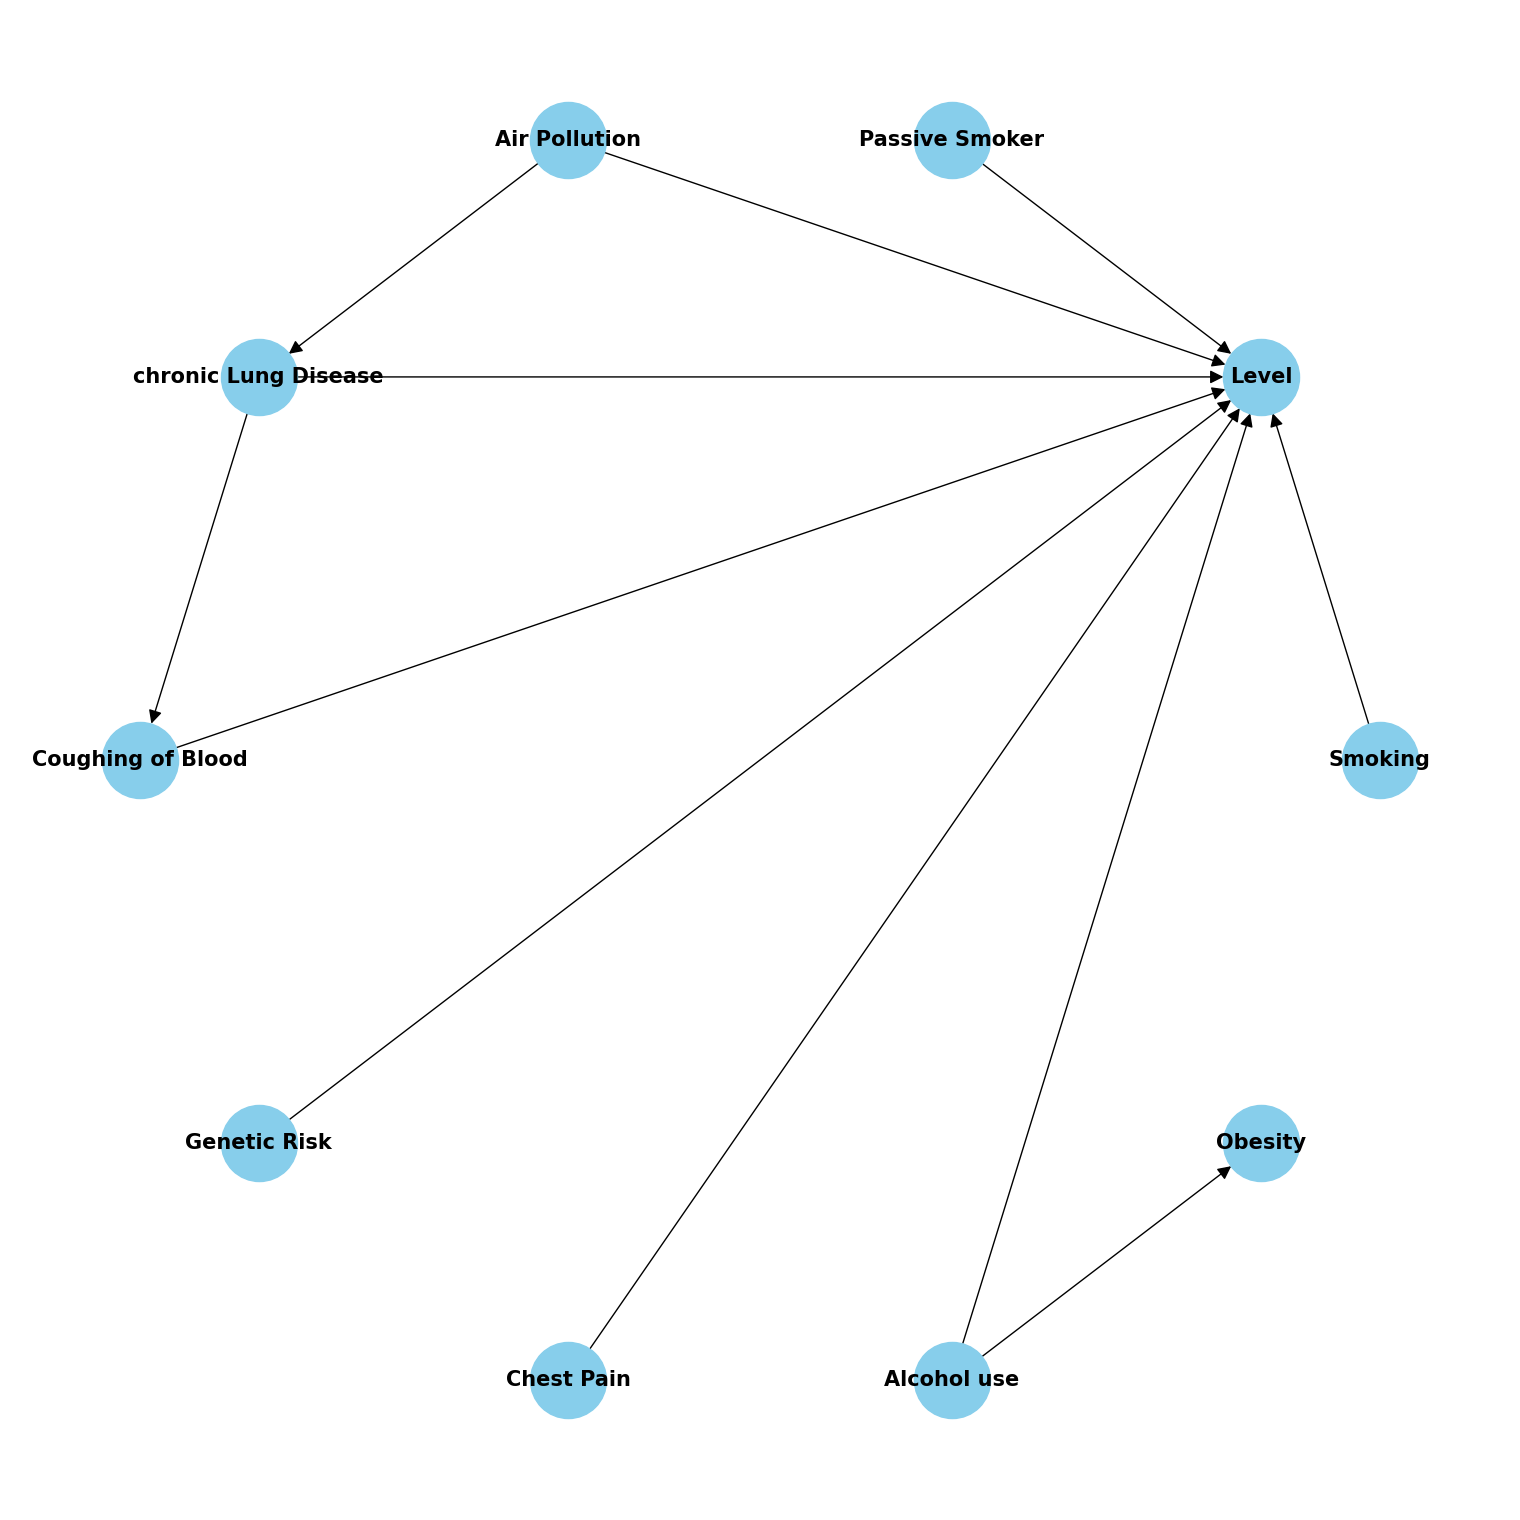

In [6]:
# We show the graph
edges = model.edges()

G = nx.DiGraph()
G.add_edges_from(edges)

plt.figure(figsize=(15,15))
# nx.arf_layout(G) --> sparse
# nx.shell_layout(G) --> in circle
# nx.planar_layout(G) --> sparse
# nx.spiral_layout(G) --> spiral
# nx.random_layout(G) --> random
# nx.spring_layout(G) --> random
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=3000, node_color="skyblue", font_size=15, arrowsize=20)
plt.show()

## Queries

In [14]:
inference = VariableElimination(model)

# Query: Qual è la probabilità di essere in debito dato il reddito e il fatto che l'utente possiede una casa?
query_result = inference.query(variables=['Level'])

# Visualizza i risultati
print(query_result)

+----------+--------------+
| Level    |   phi(Level) |
+==========+==============+
| Level(0) |       0.3335 |
+----------+--------------+
| Level(1) |       0.3333 |
+----------+--------------+
| Level(2) |       0.3333 |
+----------+--------------+


In [16]:
# Print all the learned CPTs
for cpd in model.get_cpds():
    print('CPT of {}'.format(cpd.variable))
    print(cpd, '\n')

CPT of Smoking
+------------+-------+
| Smoking(1) | 0.181 |
+------------+-------+
| Smoking(2) | 0.222 |
+------------+-------+
| Smoking(3) | 0.172 |
+------------+-------+
| Smoking(4) | 0.059 |
+------------+-------+
| Smoking(5) | 0.01  |
+------------+-------+
| Smoking(6) | 0.06  |
+------------+-------+
| Smoking(7) | 0.207 |
+------------+-------+
| Smoking(8) | 0.089 |
+------------+-------+ 

CPT of Level
